# Principle Component Analysis (PCA)

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
from sklearn.datasets import make_classification
from sklearn.gaussian_process.kernels import RBF
from mpl_toolkits.mplot3d import Axes3D


np.random.seed(42)

## Data

In [2]:
def get_cicle_data(n=50, r=1):
    
    np.random.seed(n)
    
    thetas = np.random.uniform(0, 2*np.pi, n)
    data = np.array([r * np.sin(thetas), r * np.cos(thetas)]).T + np.random.normal(scale=1/8, size=(n,2))
    
    return data

In [3]:
def get_gaussian_data(n, mean=0.0, sigma=1.0):
    
    np.random.seed(n)
    
    data = np.random.normal(loc=mean, scale=sigma, size=(n,2))
    
    return data

In [4]:
data, labels = make_classification(n_samples=25, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1, random_state=42, class_sep=0)

<IPython.core.display.Javascript object>


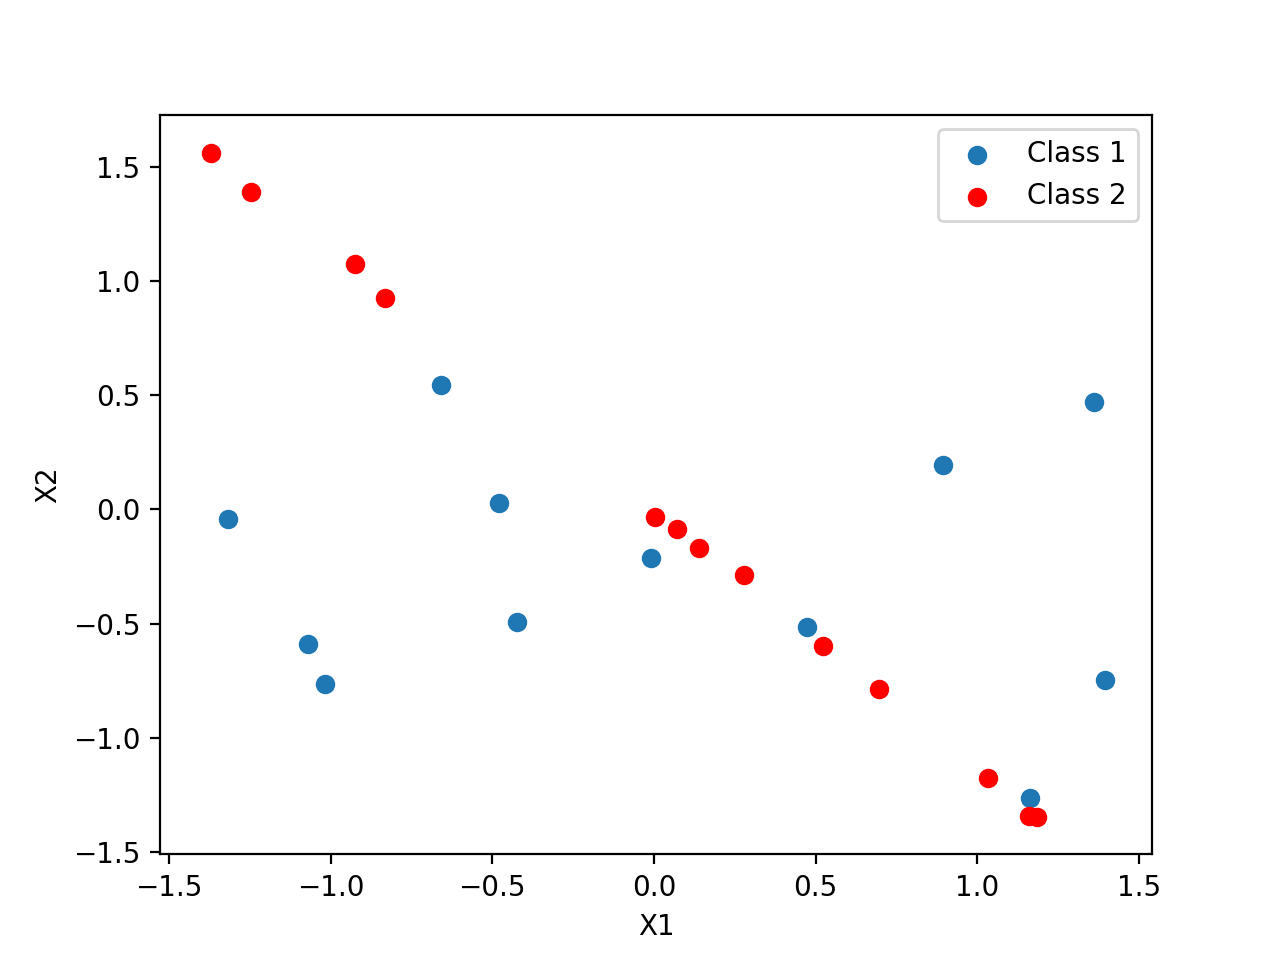

In [5]:
class_1 = data[np.where(labels==1)]
class_2 = data[np.where(labels==0)]


f, ax = plt.subplots()
ax.scatter(class_1[:,0],class_1[:,1], label = "Class 1")
ax.scatter(class_2[:,0],class_2[:,1], color = "red", label = "Class 2")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.legend()
plt.show()

### PCA implementation

In [6]:
def PCA(xs, l, center = False):
    d = xs.shape[-1]
    if center:
        mean_x = xs.mean(axis=0)
        xs -= mean_x
    
    covariance_matrix = np.dot(np.transpose(xs),xs)
    eig_values, eig_vectors = LA.eig(covariance_matrix)
    
    descending_order = np.argsort(eig_values)[::-1]
    sorted_eig_values = eig_values[descending_order]
    sorted_eig_vectors = eig_vectors[descending_order]
    
    print("Eigenvalues: ", sorted_eig_values)
    print("Corresponding Eigenvectors: \n", sorted_eig_vectors)
    
    l_largest = sorted_eig_vectors[:,:l]
    
    ys = np.dot(xs,l_largest)
    if center:
        zs = np.dot(xs,np.dot(l_largest,np.transpose(l_largest)))+ mean_x
    else:
        zs = np.dot(xs,np.dot(l_largest,np.transpose(l_largest)))
    
    return ys, zs, sorted_eig_values, l_largest

In [7]:
ys, zs, sorted_eig_values, l_largest = PCA(data,1)

Eigenvalues:  [ 30.41442961   6.84954069]
Corresponding Eigenvectors: 
 [[ 0.76389923  0.64533555]
 [-0.64533555  0.76389923]]


### Projection of transformation in orginial data space 

<IPython.core.display.Javascript object>


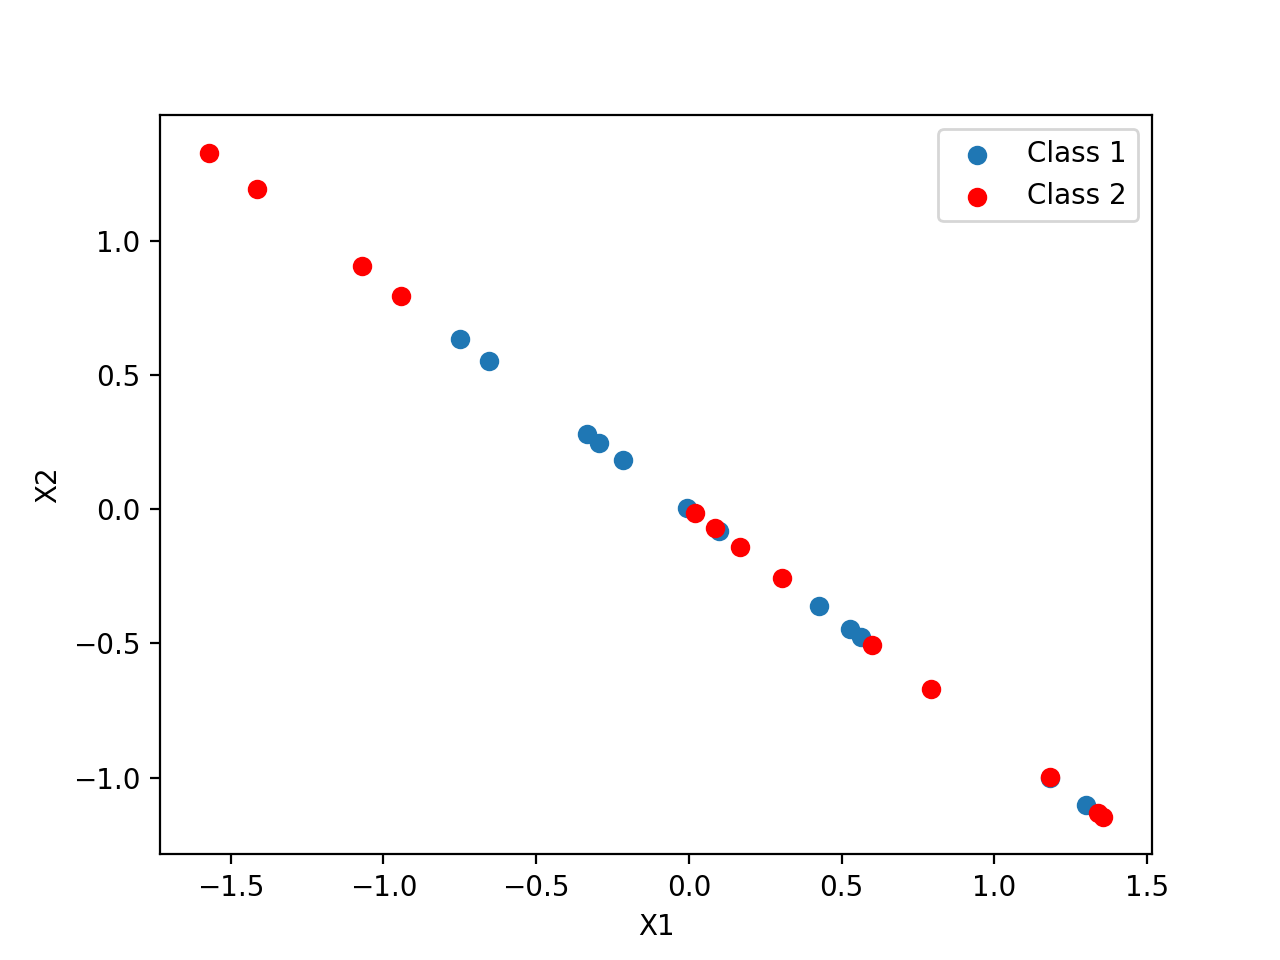

In [8]:
zs_class_1 = zs[np.where(labels==1)]
zs_class_2 = zs[np.where(labels==0)]


f, ax = plt.subplots()
ax.scatter(zs_class_1[:,0],zs_class_1[:,1], label = "Class 1")
ax.scatter(zs_class_2[:,0],zs_class_2[:,1], color = "red", label = "Class 2")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.legend()
plt.show()

### Reconstruction error

<IPython.core.display.Javascript object>


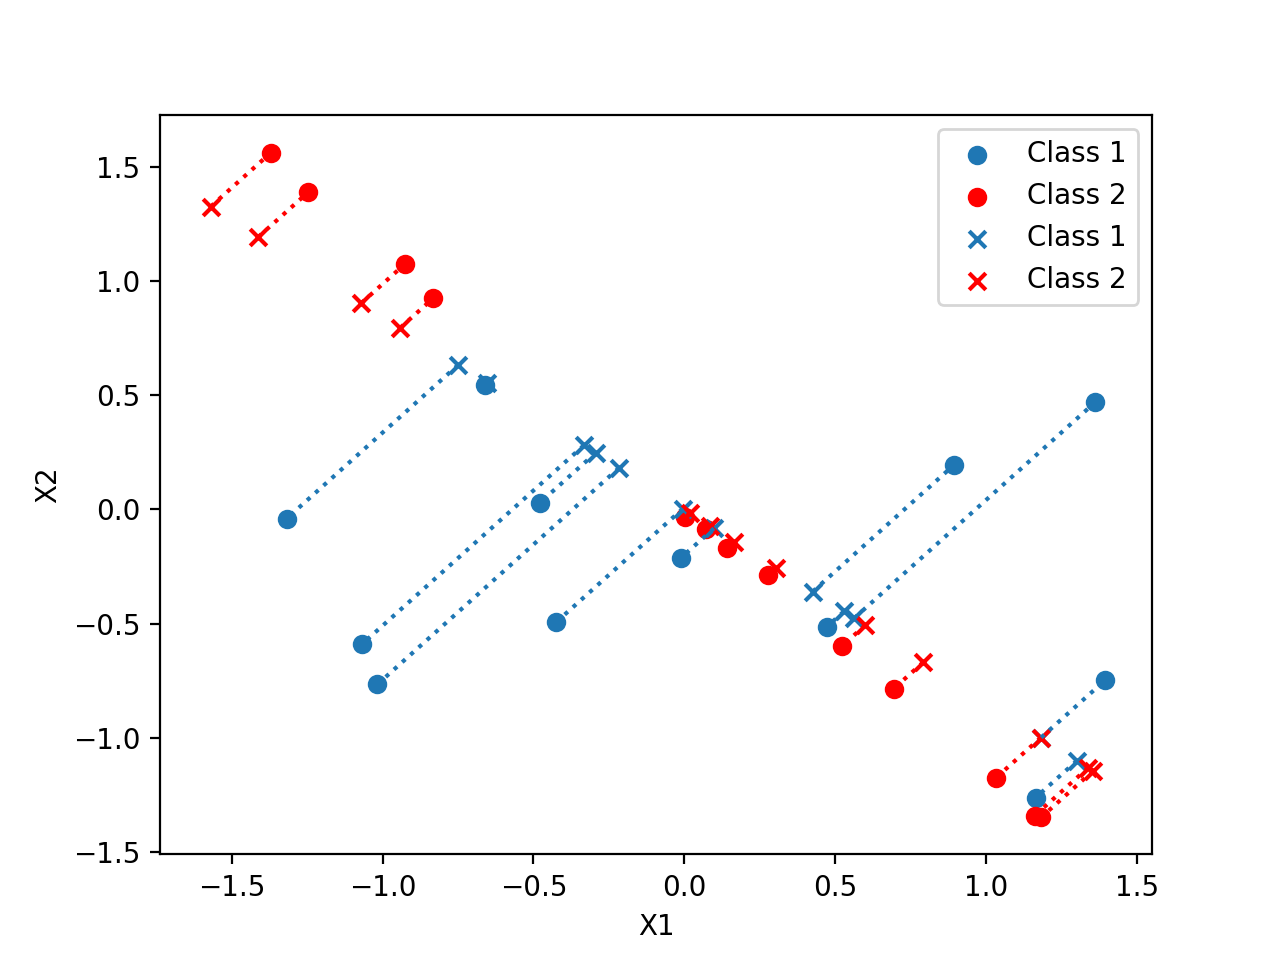

In [9]:
f, ax = plt.subplots()
ax.scatter(class_1[:,0],class_1[:,1], label = "Class 1", color = 'C0')
ax.scatter(class_2[:,0],class_2[:,1], color = "red", label = "Class 2")
ax.scatter(zs_class_1[:,0],zs_class_1[:,1], label = "Class 1", color = 'C0', marker = 'x')
ax.scatter(zs_class_2[:,0],zs_class_2[:,1], color = "red", label = "Class 2", marker = 'x')

ax.set_xlabel("X1")
ax.set_ylabel("X2")

for i,z_i in enumerate(zs_class_1):
    x, z = [z_i[0], class_1[i,0]], [z_i[1], class_1[i,1]]
    plt.plot(x, z, marker = 'None', color = 'C0', linestyle= ":")
    
for i,z_i in enumerate(zs_class_2):
    x, z = [z_i[0], class_2[i,0]], [z_i[1], class_2[i,1]]
    plt.plot(x, z, marker = 'None', color = 'red',linestyle= ":")   
    
ax.legend()
plt.show()

### PCA for circular data

In [10]:
a = get_cicle_data(25, 1)
b = get_cicle_data(25, 3)
data = np.concatenate([a,b])
labels = np.concatenate([np.zeros(a.shape[0]), np.ones(b.shape[0])])

In [11]:
ys, zs, sorted_eig_values, l_largest = PCA(data,1)

Eigenvalues:  [ 146.41046814  103.95602732]
Corresponding Eigenvectors: 
 [[-0.06848857 -0.9976519 ]
 [-0.9976519   0.06848857]]


<IPython.core.display.Javascript object>


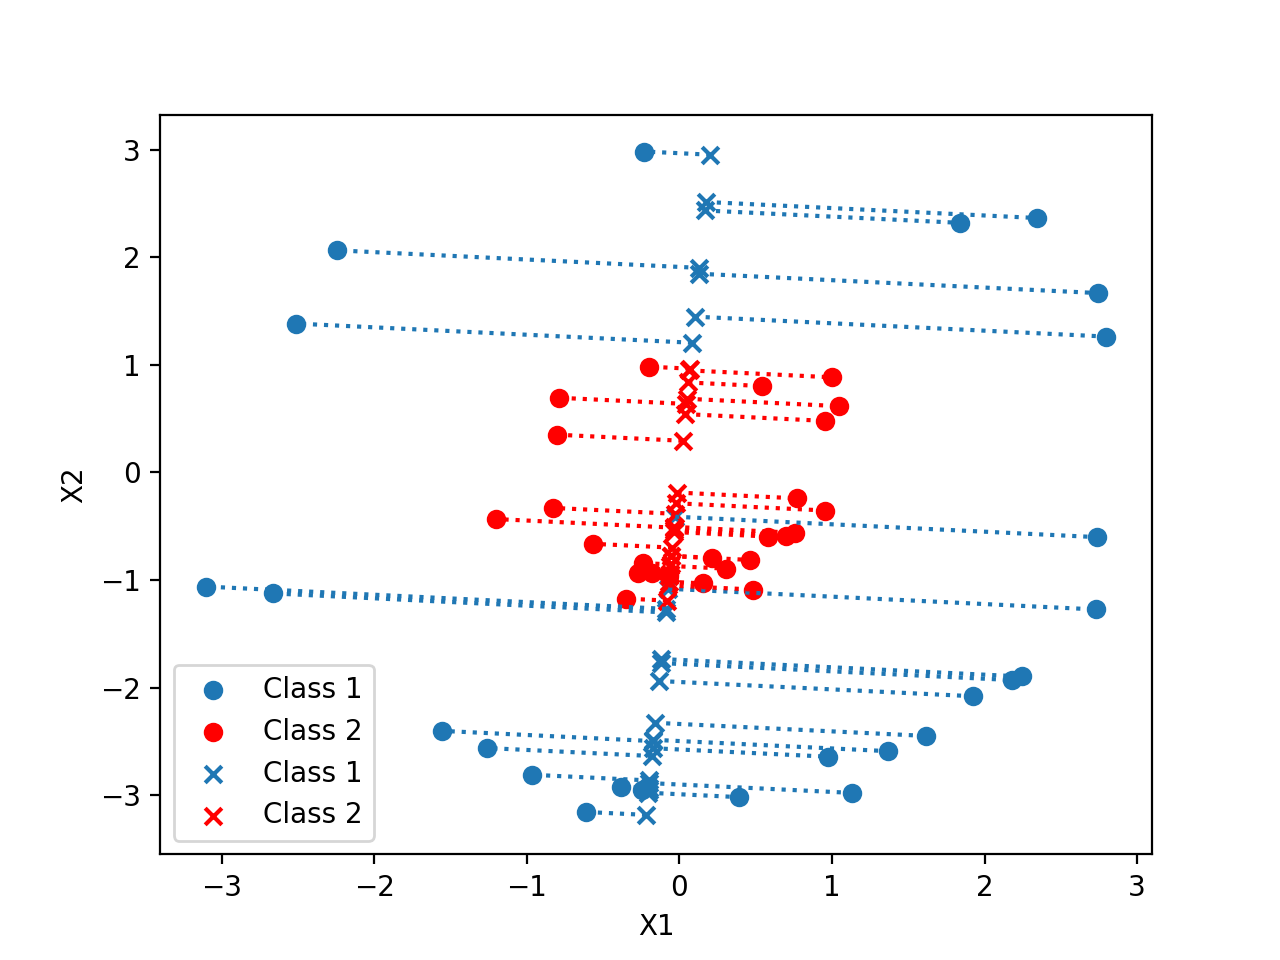

In [12]:
class_1 = data[np.where(labels==1)]
class_2 = data[np.where(labels==0)] 
zs_class_1 = zs[np.where(labels==1)]
zs_class_2 = zs[np.where(labels==0)]


f, ax = plt.subplots()
ax.scatter(class_1[:,0],class_1[:,1], label = "Class 1", color = 'C0')
ax.scatter(class_2[:,0],class_2[:,1], color = "red", label = "Class 2")
ax.scatter(zs_class_1[:,0],zs_class_1[:,1], label = "Class 1", color = 'C0', marker = 'x')
ax.scatter(zs_class_2[:,0],zs_class_2[:,1], color = "red", label = "Class 2", marker = 'x')

ax.set_xlabel("X1")
ax.set_ylabel("X2")

for i,z_i in enumerate(zs_class_1):
    x, z = [z_i[0], class_1[i,0]], [z_i[1], class_1[i,1]]
    plt.plot(x, z, marker = 'None', color = 'C0', linestyle= ":")
    
for i,z_i in enumerate(zs_class_2):
    x, z = [z_i[0], class_2[i,0]], [z_i[1], class_2[i,1]]
    plt.plot(x, z, marker = 'None', color = 'red',linestyle= ":")   
    
ax.legend()
plt.show()

### PCA for unscaled data

In [13]:
data, labels = make_classification(n_samples=25, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1, random_state=42, class_sep=0)
data[:, 0] = 100 * data[:, 0] 

<IPython.core.display.Javascript object>


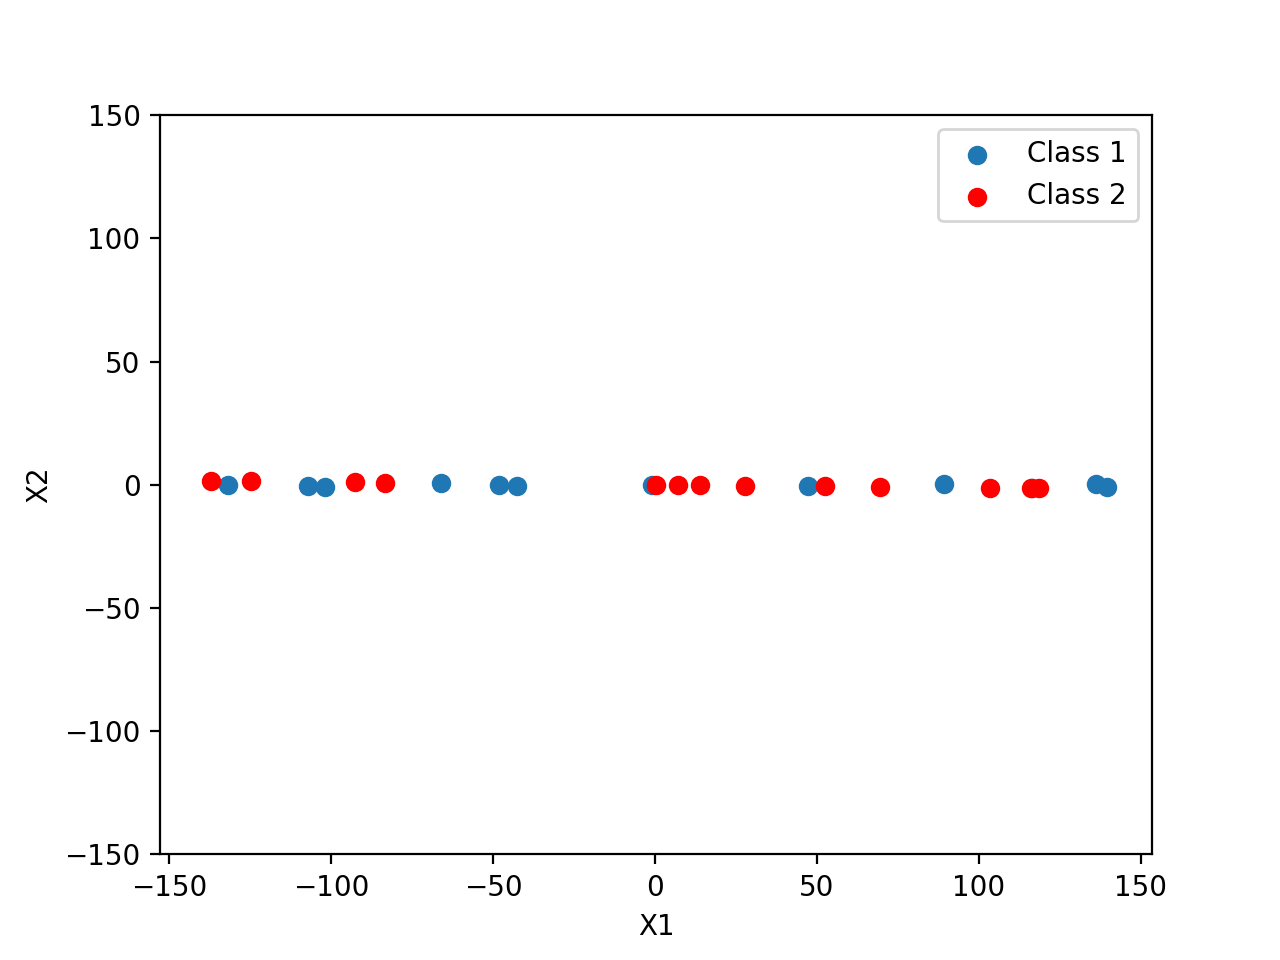

In [14]:
class_1 = data[np.where(labels==1)]
class_2 = data[np.where(labels==0)]


f, ax = plt.subplots()
ax.scatter(class_1[:,0],class_1[:,1], label = "Class 1")
ax.scatter(class_2[:,0],class_2[:,1], color = "red", label = "Class 2")
ax.set_ylim(-150,150)
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.legend()
plt.show()

In [15]:
ys, zs, sorted_eig_values, l_largest = PCA(data,1)

Eigenvalues:  [  2.06012990e+05   1.01122203e+01]
Corresponding Eigenvectors: 
 [[ 0.9999841   0.00563924]
 [-0.00563924  0.9999841 ]]


<IPython.core.display.Javascript object>


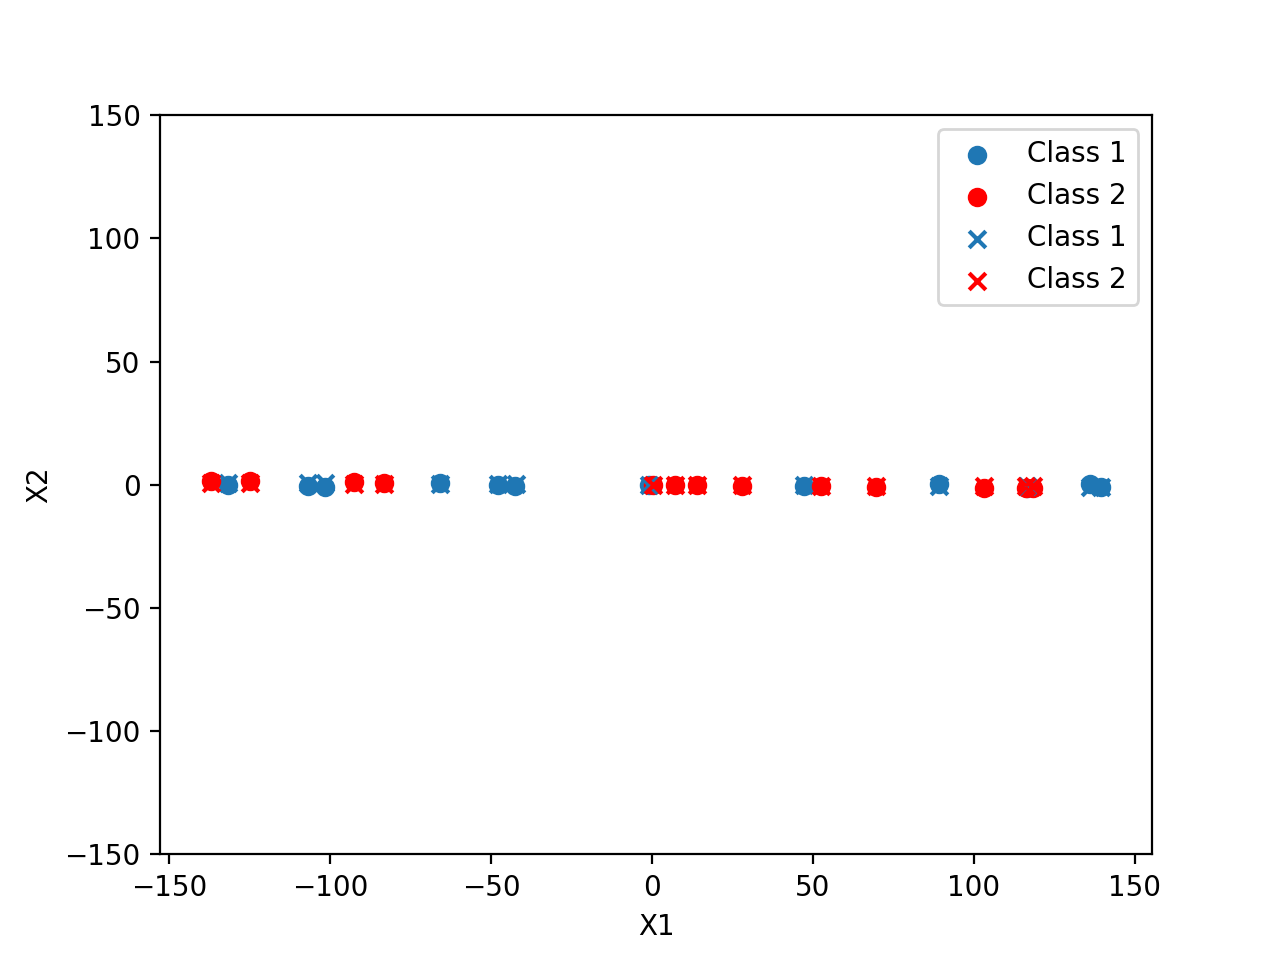

In [16]:
class_1 = data[np.where(labels==1)]
class_2 = data[np.where(labels==0)] 
zs_class_1 = zs[np.where(labels==1)]
zs_class_2 = zs[np.where(labels==0)]


f, ax = plt.subplots()
ax.scatter(class_1[:,0],class_1[:,1], label = "Class 1", color = 'C0')
ax.scatter(class_2[:,0],class_2[:,1], color = "red", label = "Class 2")
ax.scatter(zs_class_1[:,0],zs_class_1[:,1], label = "Class 1", color = 'C0', marker = 'x')
ax.scatter(zs_class_2[:,0],zs_class_2[:,1], color = "red", label = "Class 2", marker = 'x')

ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_ylim(-150,150)
for i,z_i in enumerate(zs_class_1):
    x, z = [z_i[0], class_1[i,0]], [z_i[1], class_1[i,1]]
    plt.plot(x, z, marker = 'None', color = 'C0', linestyle= ":")
    
for i,z_i in enumerate(zs_class_2):
    x, z = [z_i[0], class_2[i,0]], [z_i[1], class_2[i,1]]
    plt.plot(x, z, marker = 'None', color = 'red',linestyle= ":")   
    
ax.legend()
plt.show()

The projection is completely dominated by the unscaled dimension x1 because of its huge variance. It is not orthogonal but lies nearly directly on the original data points.

### Kernel PCA implementation

### Data

In [17]:
data = np.concatenate([get_cicle_data(100, 2),
                       get_cicle_data(100, 4),
                       get_cicle_data(100, 6)])

labels = np.concatenate([np.zeros(100),
                         np.ones(100),
                         2 * np.ones(100)])

<IPython.core.display.Javascript object>


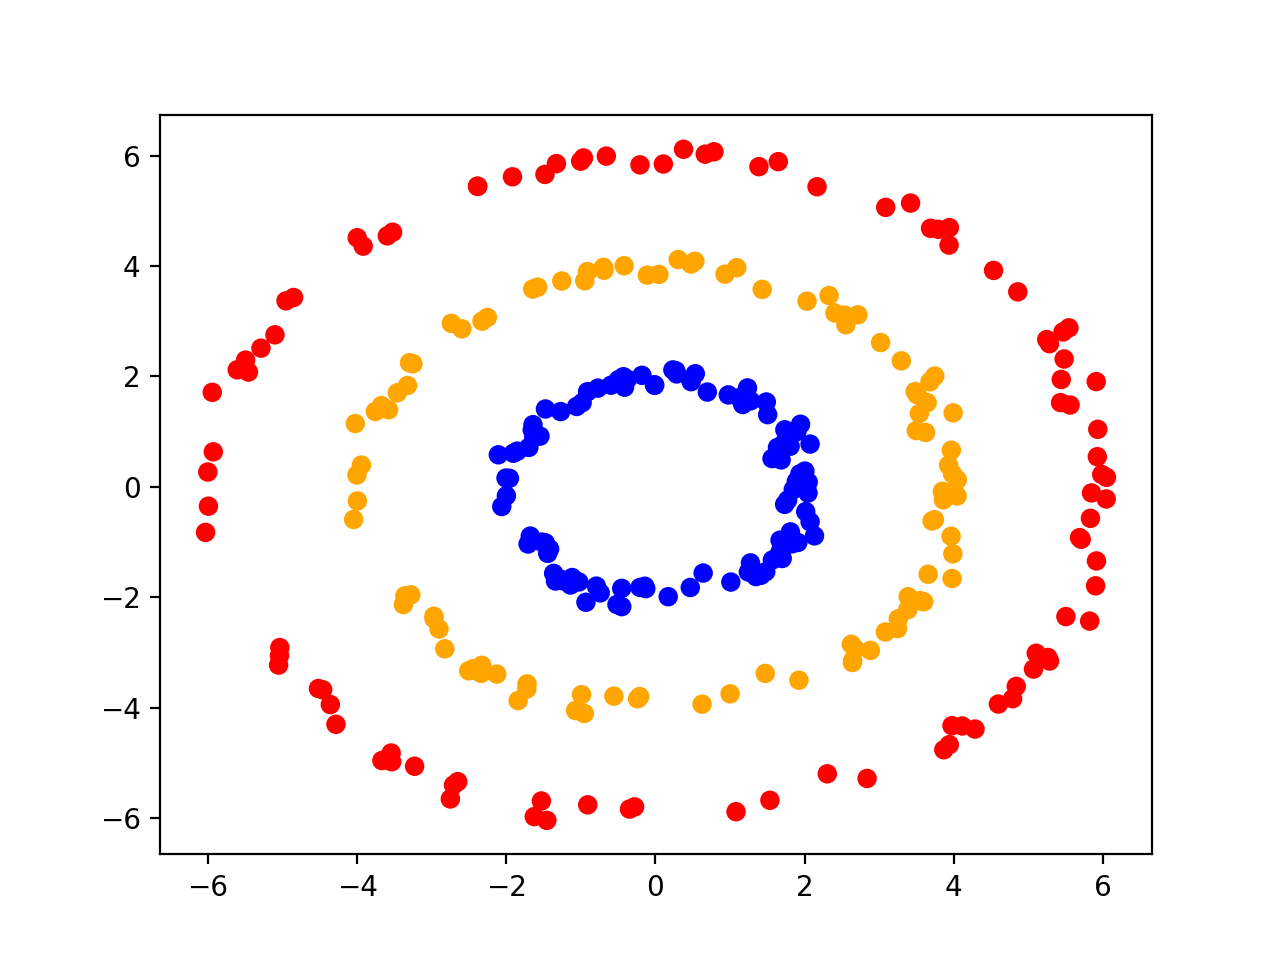

In [18]:
fig = plt.figure()
color = ['orange' if l == 1 else 'red' if l == 2 else 'b' for l in labels]
plt.scatter(data[:, 0], data[:, 1], c=color)
plt.show()

In [19]:
def kernel_PCA(kernel, l=2):
    n = kernel.shape[0]
    one_n = np.ones(kernel.shape)*(1/n)
    centered_kernel = kernel - np.dot(one_n,kernel) - np.dot(kernel,one_n) + np.dot(np.dot(one_n,kernel), one_n) 
    
    eig_values, eig_vectors = LA.eig(centered_kernel)
    eig_values, eig_vectors = eig_values.real, eig_vectors.real
    
    descending_order = np.argsort(eig_values)[::-1]
    sorted_eig_values = eig_values[descending_order]
    sorted_eig_vectors = eig_vectors[descending_order]
    
    #print("Eigenvalues: ", sorted_eig_values)
    #print("Corresponding Eigenvectors: \n", sorted_eig_vectors)
    
    l_largest_vectors = sorted_eig_vectors[:,:l]
    l_largest_values = sorted_eig_values[:l]
    
    V = l_largest_vectors
    for k,lam in enumerate(l_largest_values):
        V[:,k] /= np.sqrt(lam)
    
    
    return np.dot(kernel,V)

In [20]:
kernel = RBF(length_scale=5)
kernel = kernel(data)

### Projection in higher dimensional space 

<IPython.core.display.Javascript object>


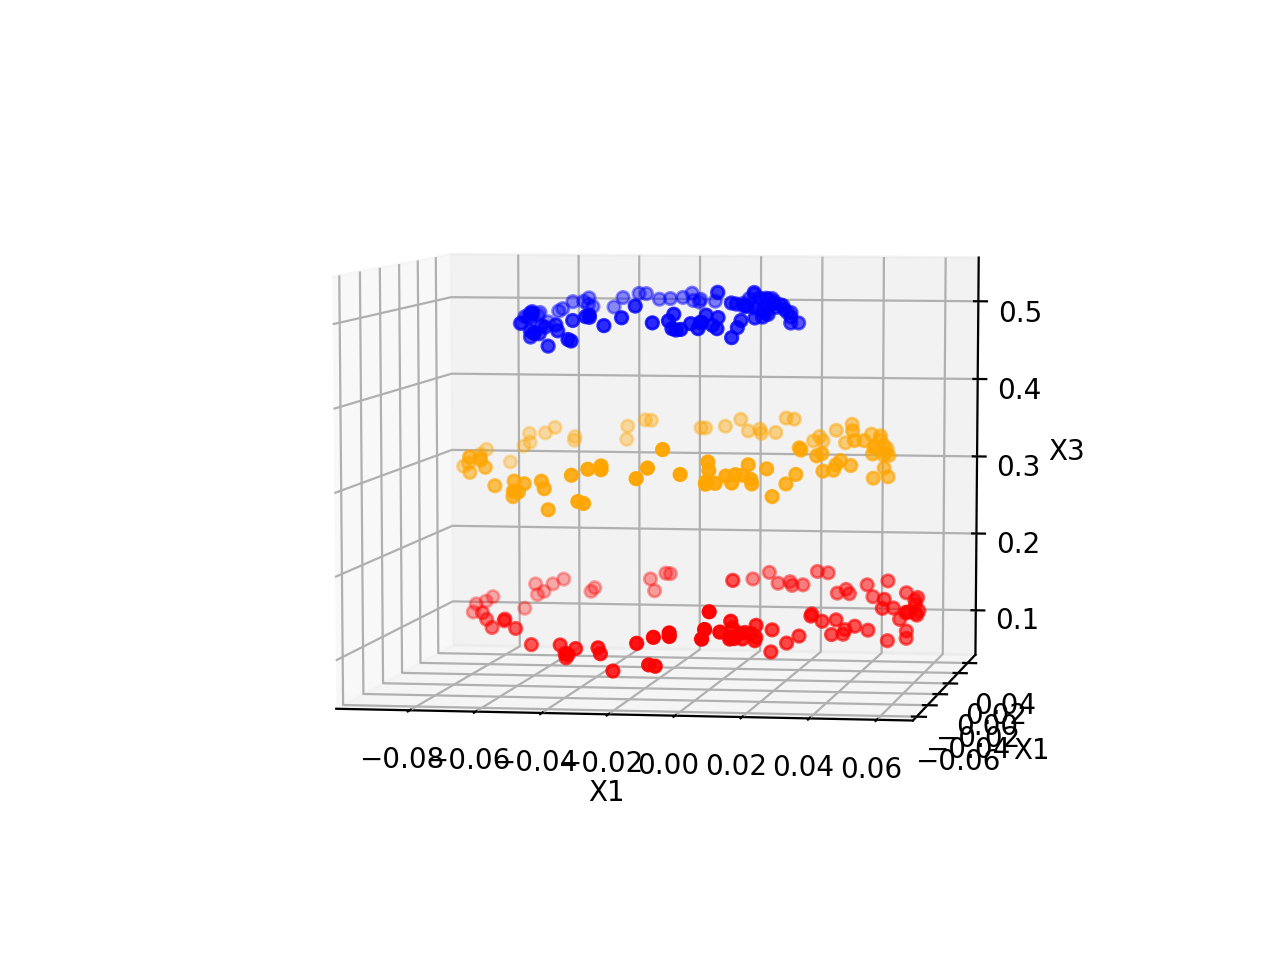

In [21]:
ys = kernel_PCA(kernel, l=3)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(ys[:,0], ys[:,1],ys[:,2], c = color)
ax.set_xlabel("X1")
ax.set_ylabel("X1")
ax.set_zlabel("X3")
plt.show()

### Exactly recovery from a PCA is impossible

a) Let $u = \begin{pmatrix} 1 \\ 0 \end{pmatrix}$ and $v = \begin{pmatrix} 0 \\ 1  \end{pmatrix}$ be vectors $\in \mathbb{R}^2$ 

Let $W = \begin{pmatrix} 1 & 0 \end{pmatrix}$ be compression matrix $\in \mathbb{R}^{1 \times 2}$
 
Following the definition of $u$ and $v$ we can show, that there exist $u, v \in \mathbb{R}^2$ such that $u \neq v$ and $Wu = Wv = 1$.
  

b) To conclude conclude that exactly recovery from a linear compression scheme is impossible we assume $u, v$ beeing defined as before and linear compression $Wu = Wv = 1$. For a reconstruction we apply a mapping with matrix $U$.

$$U(\underbrace{Wu}_{Wv}) = u^*$$

We have see in a) that a linear compression can habe same results for different vectors. Applying a reconstruction for the linear compression of $u$ will result in the same vector as for the linear compression of $v$. Therefore is exactly recovery from a linear compression scheme impossible.